In [1160]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [1161]:
# Read data
df = pd.read_csv('C:\Games\Course\Pinnacle Full Stack\Heart Disease\heart_disease_uci.csv')

In [1162]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [1163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [1164]:
df.describe(include='all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [1165]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [1166]:
df.duplicated().sum()

0

# Handlin Missing Values

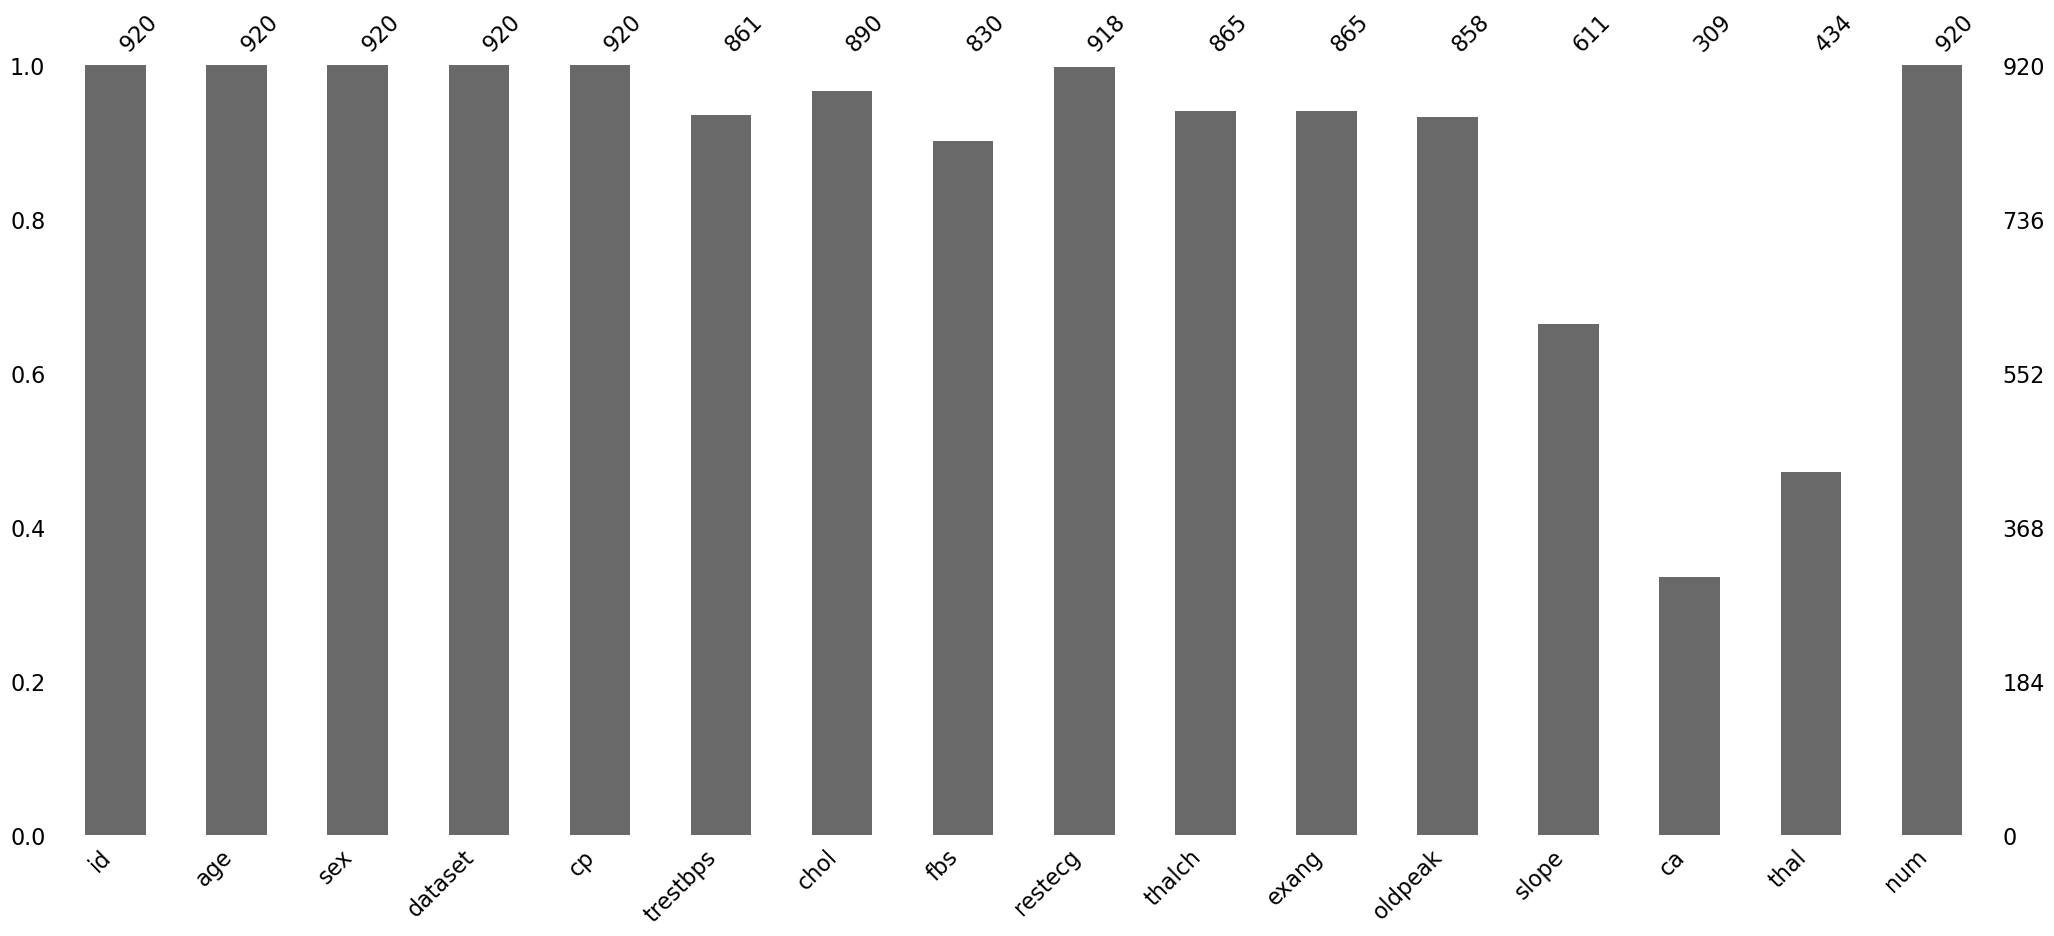

In [1167]:
# visualize the missing values
msno.bar(df)
plt.show()

In [1168]:
# handling features by mean
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())

In [1169]:
null_rows_df = df[df['restecg'].isnull()]
null_rows_df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,572,55,Male,Hungary,typical angina,140.0,295.0,False,NaN,136.0,False,0.0,NaN,NaN,NaN,1
598,599,34,Male,Switzerland,asymptomatic,115.0,0.0,0.166265,NaN,154.0,False,0.2,upsloping,NaN,NaN,1


In [1170]:
df['restecg'].fillna('normal', inplace=True)


In [1171]:
# handling some by related features
df['exang'] = df.groupby(['age', 'cp'])['exang'].apply(lambda x: x.fillna(x.median()))
df['exang'] = df['exang'].fillna(df['exang'].mean())

df['oldpeak'] = df.groupby(['age', 'cp','thalch'])['oldpeak'].apply(lambda x: x.fillna(x.median()))
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())


C:\Users\Martin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Martin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Martin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Martin\AppData\Local\Temp\ipykernel_48440\1744731834.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['exang'] = df.groupby(['

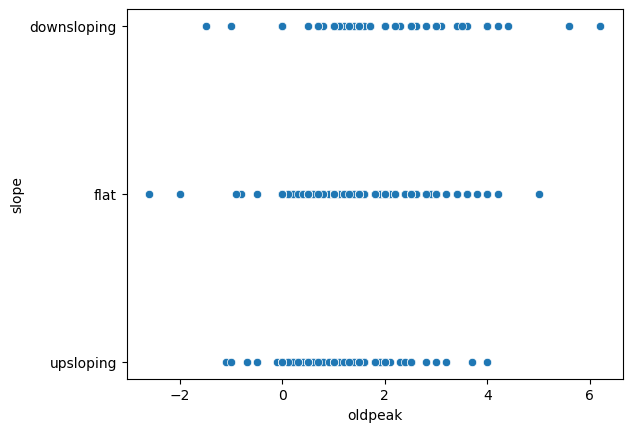

In [1172]:
# show the realtion bet oldpeak and slope
sns.scatterplot(data=df, x='oldpeak', y='slope')
plt.show()

In [1173]:
# make function to fill the missing values for the 'slope'column according to oldpeak
def fill_slope(row):
    if pd.isna(row['slope']):
        if 0.288662 <= row['oldpeak'] <= 1.387886:
            return 'upsloping'
        elif 1.387887 <= row['oldpeak'] <= 2.181249:
            return 'flat'
        elif row['oldpeak'] > 2.181250:
            return 'downsloping'
    return row['slope']

# Apply the function to the DataFrame
df['slope'] = df.apply(fill_slope, axis=1)
df['slope'].fillna(fill_slope, inplace=True)

In [1174]:
df['ca'] = df.groupby(['oldpeak', 'slope','exang'])['ca'].apply(lambda x: x.fillna(x.median()))
df['ca'] = df['ca'].fillna(df['oldpeak'].mean())

C:\Users\Martin\AppData\Local\Temp\ipykernel_48440\4080854768.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['ca'] = df.groupby(['oldpeak', 'slope','exang'])['ca'].apply(lambda x: x.fillna(x.median()))


In [1175]:
# apply random forest to see the most features for 'thal' column
# Encode categorical features if necessary
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Define features and target variable
X = df.drop(columns='thal')
y = df['thal']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the top 3 features
print("Top 3 features influencing 'thal':")
print(feature_importances.head(3))


Top 3 features influencing 'thal':
id         0.224180
dataset    0.144597
thalch     0.106806
dtype: float64


In [1176]:
df['thal'] = df.groupby(['thalch'])['thal'].apply(lambda x: x.fillna(x.median()))

C:\Users\Martin\AppData\Local\Temp\ipykernel_48440\3968464760.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['thal'] = df.groupby(['thalch'])['thal'].apply(lambda x: x.fillna(x.median()))


In [1177]:
# after data cleaning
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

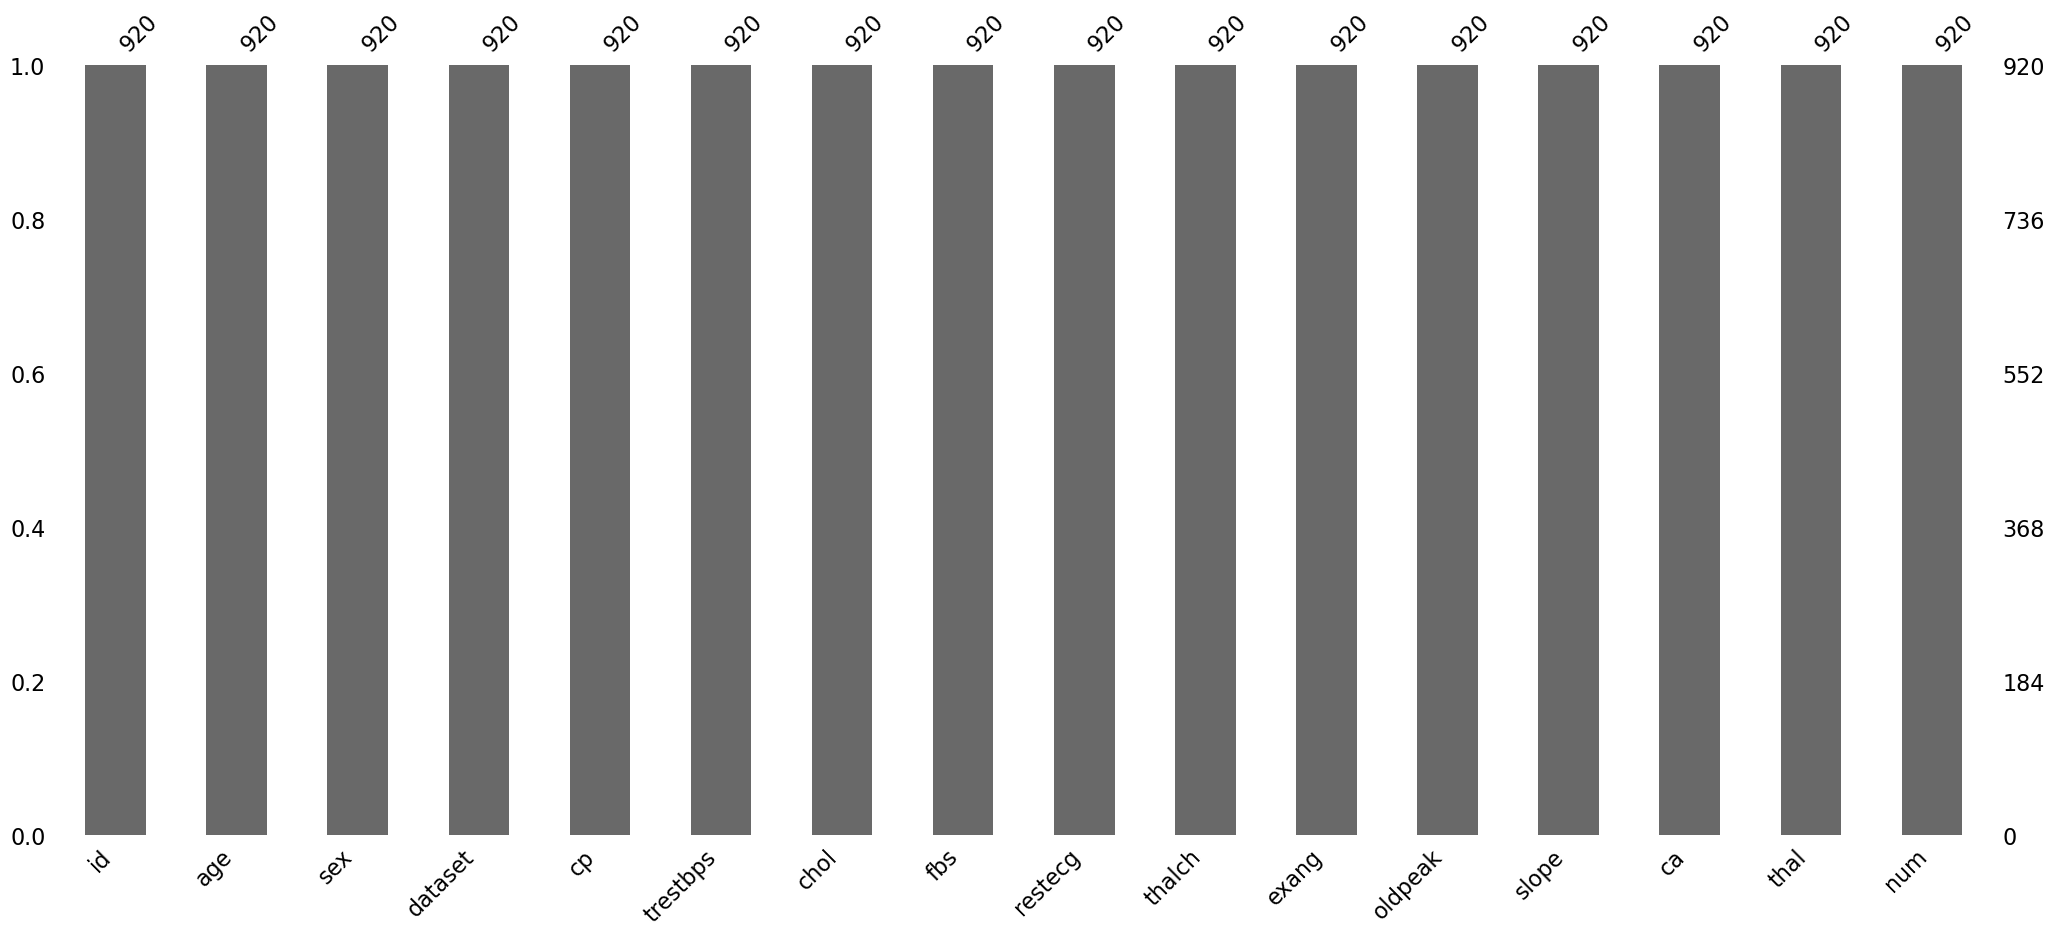

In [1178]:
# visualize the missing values
msno.bar(df)
plt.show()

In [1179]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,2,0,150.0,4,2.3,1,0.0,0,0
1,2,67,1,0,0,160.0,286.0,1,0,108.0,5,1.5,2,3.0,2,2
2,3,67,1,0,0,120.0,229.0,1,0,129.0,5,2.6,2,2.0,3,1
3,4,37,1,0,2,130.0,250.0,1,1,187.0,4,3.5,1,0.0,2,0
4,5,41,0,0,1,130.0,204.0,1,0,172.0,4,1.4,3,0.0,2,0


In [1180]:
# df['cp'] = df['cp'].replace(['asymptomatic','non-anginal','atypical angina','typical angina'],[0,1,2,3])
# df['restecg'] = df['restecg'].replace(['normal','lv hypertrophy','st-t abnormality'],[0,1,2])
# df['sex'] = df['sex'].replace(['Male','Female'],[0,1])
# df['thal'] = df['thal'].replace(['normal','fixed defect','reversable defect'],[0,1,2])
# df['dataset'] = df['dataset'].replace(['Cleveland','Hungary','VA Long Beach','Switzerland'],[0,1,2,3])
# df['fbs'] = df['fbs'].replace(['False','True'],[0,1])
# df['exang'] = df['exang'].replace(['False','True'],[0,1])
# df['slope'] = df['slope'].replace(['upsloping','flat','downsloping'],[0,1,2])



# handling Outlier 

In [1181]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR
# Identify outliers
chol_outliers = df[df['chol'] > upper_bound]


In [1182]:
chol_outliers

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
48,49,65,0,0,2,140.0,417.0,2,0,157.0,4,0.8,3,1.0,2,0
121,122,63,0,0,0,150.0,407.0,1,0,154.0,4,4.0,2,3.0,3,4
152,153,67,0,0,2,115.0,564.0,1,0,160.0,4,1.6,2,0.0,3,0
181,182,56,0,0,0,134.0,409.0,1,0,150.0,5,1.9,2,2.0,3,2
373,374,44,1,1,0,150.0,412.0,1,1,170.0,4,0.0,0,0.0,1,0
434,435,53,0,1,1,113.0,468.0,0,1,127.0,4,0.0,0,0.0,1,0
500,501,40,1,1,0,120.0,466.0,0,1,152.0,5,1.0,2,0.0,0,1
528,529,32,1,1,0,118.0,529.0,1,1,130.0,4,0.0,0,0.0,1,1
546,547,54,1,1,0,130.0,603.0,2,1,125.0,5,1.0,2,0.0,1,1
566,567,52,1,1,0,140.0,404.0,1,1,124.0,5,2.0,2,1.0,1,1


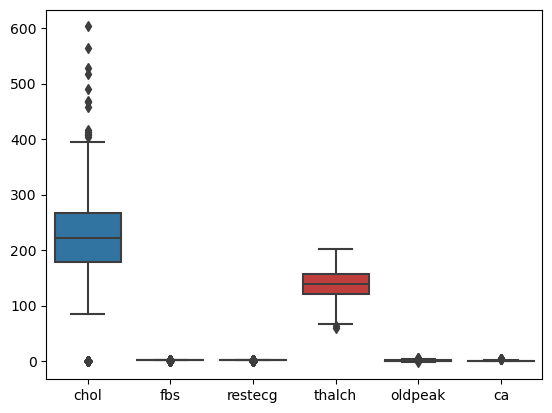

In [1183]:
# showing if there is outlier
sns.boxplot(data=df[['chol','fbs','restecg','thalch','oldpeak','ca']])
plt.show()


In [1184]:
import pandas as pd

# Calculate the IQR
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
chol_outliers = df[df['chol'] > upper_bound]
print("Number of outliers in 'chol':", chol_outliers.shape[0])

# Drop outliers from the DataFrame in place
df.drop(df[df['chol'] > upper_bound].index, inplace=True)

# Verify the shape of the DataFrame before and after dropping outliers
print("DataFrame shape after removing outliers in 'chol':", df.shape)

#reset the index of the cleaned DataFrame
df.reset_index(drop=True, inplace=True)


Number of outliers in 'chol': 13
DataFrame shape after removing outliers in 'chol': (907, 16)


In [1185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        907 non-null    int64  
 1   age       907 non-null    int64  
 2   sex       907 non-null    int32  
 3   dataset   907 non-null    int32  
 4   cp        907 non-null    int32  
 5   trestbps  907 non-null    float64
 6   chol      907 non-null    float64
 7   fbs       907 non-null    int32  
 8   restecg   907 non-null    int32  
 9   thalch    907 non-null    float64
 10  exang     907 non-null    int32  
 11  oldpeak   907 non-null    float64
 12  slope     907 non-null    int32  
 13  ca        907 non-null    float64
 14  thal      907 non-null    int32  
 15  num       907 non-null    int64  
dtypes: float64(5), int32(8), int64(3)
memory usage: 85.2 KB


In [1186]:
# import pandas as pd

# # Calculate the IQR
# Q1 = df['chol'].quantile(0.25)
# Q3 = df['chol'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper bound for outliers
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR  # Adding lower bound for completeness

# # Identify outliers
# chol_outliers = df[(df['chol'] > upper_bound) | (df['chol'] < lower_bound)]
# print("Number of outliers in 'chol':", chol_outliers.shape[0])

# # Drop outliers from the DataFrame in place
# df.drop(df[(df['chol'] > upper_bound) | (df['chol'] < lower_bound)].index, inplace=True)

# # Verify the shape of the DataFrame after dropping outliers
# print("DataFrame shape after removing outliers in 'chol':", df.shape)

# # Optionally, you can reset the index of the cleaned DataFrame
# df.reset_index(drop=True, inplace=True)


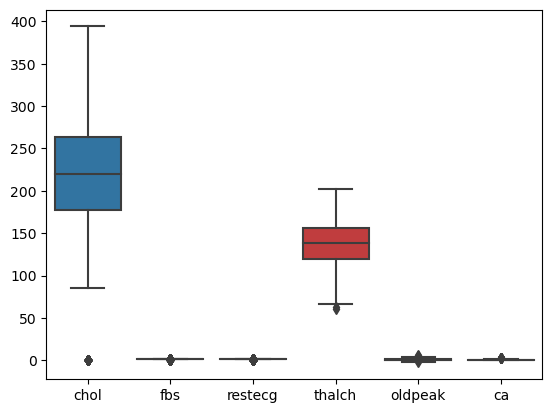

In [1187]:
# showing if there is outlier
sns.boxplot(data=df[['chol','fbs','restecg','thalch','oldpeak','ca']])
plt.show()



# apply Logistic Regression model 

In [1188]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,2,0,150.0,4,2.3,1,0.0,0,0
1,2,67,1,0,0,160.0,286.0,1,0,108.0,5,1.5,2,3.0,2,2
2,3,67,1,0,0,120.0,229.0,1,0,129.0,5,2.6,2,2.0,3,1
3,4,37,1,0,2,130.0,250.0,1,1,187.0,4,3.5,1,0.0,2,0
4,5,41,0,0,1,130.0,204.0,1,0,172.0,4,1.4,3,0.0,2,0


In [1189]:
# define X (features) and y (target)
# example features
X = df[[ 'num','age', 'chol', 'thalch', 'trestbps','restecg']] 
# target variable
y = df['num']  

# Split the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1190]:
# define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# fit the model on the training data
logreg.fit(X_train, y_train)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [1191]:
# Predict on the test set
y_pred = logreg.predict(X_test)


In [1192]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# apply the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.98
Confusion Matrix:
 [[80  0  0  0  0]
 [ 0 56  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  2 23  0]
 [ 0  0  0  1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        56
           2       0.89      1.00      0.94        17
           3       0.96      0.92      0.94        25
           4       1.00      0.75      0.86         4

    accuracy                           0.98       182
   macro avg       0.97      0.93      0.95       182
weighted avg       0.98      0.98      0.98       182

